In [2]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import contextily as ctx
import scipy.stats
import seaborn.palettes
import seaborn.utils

trees = gpd.read_file('trees/FME_BaumdatenBearbeitet_OGD_20200806.csv')
trees = gpd.GeoDataFrame(trees, geometry = gpd.points_from_xy(trees.lon, trees.lat))
trees = trees.set_crs(epsg=4326)
trees.tail()

,Flaeche,BaumNr,Gattung,Art,Sorte,NameDeutsch,Hoehe,Schirmdurchmesser,Stammumfang,Typ,XPos,YPos,lon,lat,geometry
25920,383,997FL,Fraxinus,sp.,-,Esche,14,0,0,L,71101,345362,14.2898116078760,48.2425810910511,POINT (14.28981 48.24258)
25921,902,999FL,Quercus,sp.,-,Eiche,15,0,0,L,71583,346975,14.2965763204513,48.2570230214176,POINT (14.29658 48.25702)
25922,1452,253,Catalpa,erubescens,Purpurea,b'Rotbl\xe4ttriger Trompetenbaum',10,7,145,L,69397,350942,14.2677862974735,48.2929404222607,POINT (14.26779 48.29294)
25923,1452,251,Catalpa,erubescens,Purpurea,b'Rotbl\xe4ttriger Trompetenbaum',7,8,154,L,69402,350950,14.2678597257395,48.2930071754499,POINT (14.26786 48.29301)
25924,5545,999FL,Prunus,sp.,-,Kirsche,15,0,0,L,75401,346121,14.3478251809098,48.2489044318912,POINT (14.34783 48.24890)


In [3]:
linz_districts = gpd.read_file('linz/StatBez_Linz_EPSG_4326.gml')
linz_districts.tail()

,fid,Stb,Bezeichung,Flaeche,STBn,geometry
11,StatBez_Linz.11,12,Neue Heimat,4.131710e+06,12,"POLYGON Z ((14.29773 48.23540 0.00000, 14.2977..."
12,StatBez_Linz.12,13,Kleinm?nchen-Auwiesen,6.450960e+06,13,"POLYGON Z ((14.33435 48.25557 0.00000, 14.3343..."
13,StatBez_Linz.13,14,Industriegebiet-Hafen,1.277422e+07,14,"POLYGON Z ((14.37365 48.27055 0.00000, 14.3730..."
14,StatBez_Linz.14,15,Ebelsberg,1.291288e+07,15,"POLYGON Z ((14.36772 48.23566 0.00000, 14.3675..."
15,StatBez_Linz.15,16,Pichling,1.290017e+07,16,"POLYGON Z ((14.40922 48.24887 0.00000, 14.4088..."


<AxesSubplot:>

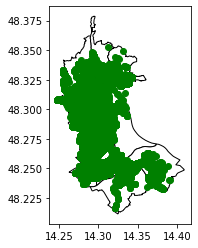

In [4]:
ax = linz_districts.plot(color = 'white', edgecolor='black')
trees.plot(ax = ax, color = 'green')

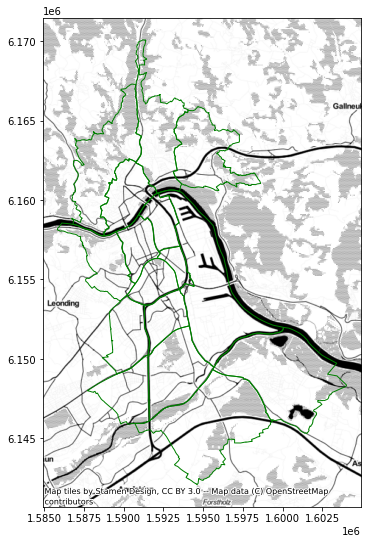

In [15]:
# trees = trees.to_crs(epsg=3857)
linz_districts = linz_districts.to_crs(epsg=3857)

fig = plt.figure(figsize=(9,9))
ax = plt.subplot()
linz_districts.plot(color='none',edgecolor='green', ax = ax)
ctx.add_basemap(ax = ax, source=ctx.providers.Stamen.Toner, crs=linz_districts.crs.to_string())


In [7]:
w,s,e,n = linz_districts.unary_union.bounds
_ = ctx.bounds2raster(w, s, e, n,
                     ll=True,
                     path="linz.tif",
                     source=ctx.providers.CartoDB.Positron
                    )

ValueError: The inferred zoom level of -4 is not valid for the current tile provider (valid zooms: 0 - 19). This can indicate that the extent of your figure is wrong (e.g. too small extent, or in the wrong coordinate reference system)

In [71]:
w

1585826.2953386582

/Users/dev/anaconda3/envs/maps/lib/python3.7/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


<AxesSubplot:>

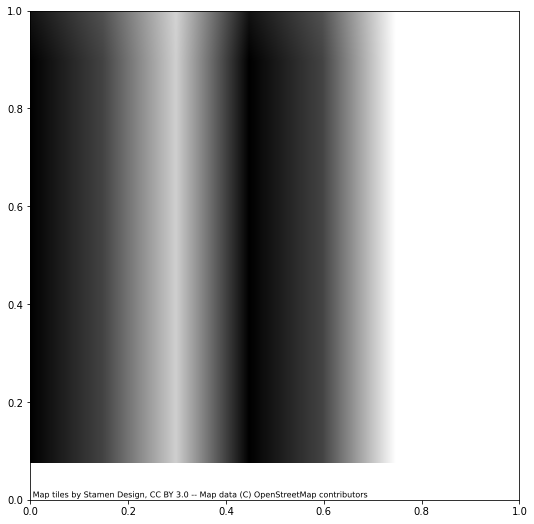

In [13]:
df = gpd.read_file('linz/StatBez_Linz_EPSG_4326.gml')
df = linz_districts.to_crs(epsg=3857)

fig = plt.figure(figsize=(16,9))
ax = plt.subplot()
ctx.add_basemap(ax = ax, source=ctx.providers.Stamen.Toner, crs=df.crs.to_string())
df.plot(color='none',edgecolor='green', ax = ax)

In [16]:
df.tail()

,fid,Stb,Bezeichung,Flaeche,STBn,geometry
11,StatBez_Linz.11,12,Neue Heimat,4.131710e+06,12,"POLYGON Z ((1591616.264 6146107.180 0.000, 159..."
12,StatBez_Linz.12,13,Kleinm?nchen-Auwiesen,6.450960e+06,13,"POLYGON Z ((1595692.062 6149478.402 0.000, 159..."
13,StatBez_Linz.13,14,Industriegebiet-Hafen,1.277422e+07,14,"POLYGON Z ((1600067.688 6151983.771 0.000, 159..."
14,StatBez_Linz.14,15,Ebelsberg,1.291288e+07,15,"POLYGON Z ((1599406.870 6146150.353 0.000, 159..."
15,StatBez_Linz.15,16,Pichling,1.290017e+07,16,"POLYGON Z ((1604026.683 6148357.878 0.000, 160..."
